**Домашняя работа 1, Серов Илья Алексеевич**

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.utils import to_categorical

Разведывательный анализ тренировочных данных

In [2]:
train_df = pd.read_csv("fmnist_train.csv")
print("Train NaN:", train_df.isna().sum().sum())
print(train_df.shape)
display(train_df)
train_df.info()

Train NaN: 424
(17040, 786)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037
17038,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17038


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB


Для удобства переведем все значения в формат int. Также заменим все пропуски на значение 0 (черный) и уберем столбец ID.

In [3]:
clean_train_df = train_df.fillna(0).drop(columns=['Id']).astype(int)
display(clean_train_df)
clean_train_df.info()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,195,186,16,0,2,0,0,0,0,0
17036,4,0,0,0,0,0,0,5,4,3,...,0,0,33,48,37,3,0,0,0,0
17037,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17038,6,0,0,0,0,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 102.1 MB


Для наглядности - посмотрим какой предмет одежды принадлежит к конкретному классу (какая метка).

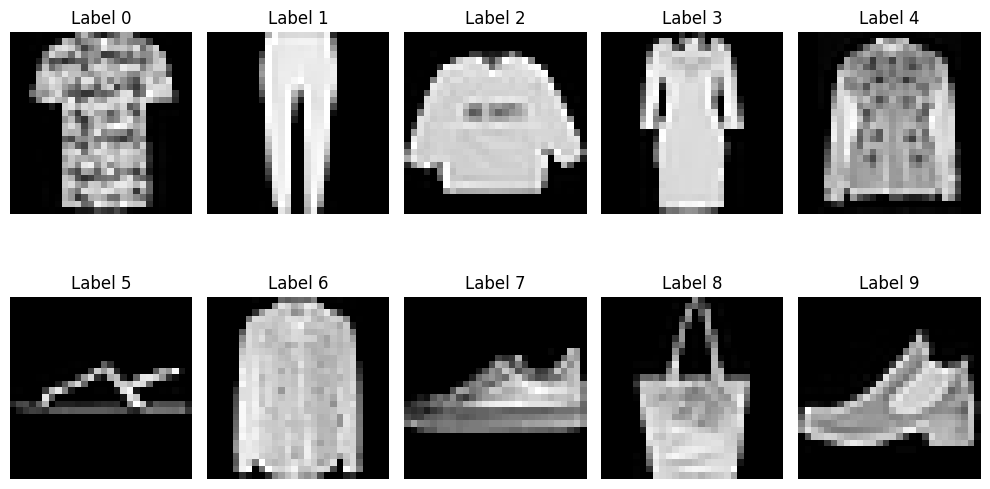

In [4]:
classes = sorted(clean_train_df['label'].unique())
plt.figure(figsize=(10, 6))

for i, cls in enumerate(classes):
    idx = clean_train_df[clean_train_df['label'] == cls].index[0]
    img = clean_train_df.loc[idx].drop('label').values.reshape(28, 28)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label {cls}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Нормализуем значения пикселей, деля их на 255, чтобы привести их в диапазон [0, 1] и улучшить стабильность и скорость обучения модели.

In [5]:
pixel_data = clean_train_df.drop(columns=['label'])

print(f"Минимальное занчение пикселя в датасете: {pixel_data.min().min()}")
print(f"Максимальное занчение пикселя в датасете: {pixel_data.max().max()}")
# Создаем копию датафрейма для нормализации
normalized_df = clean_train_df.copy()
pixel_cols = [c for c in normalized_df.columns if c.startswith('pixel')]
# Нормализуем пиксели
normalized_df[pixel_cols] = normalized_df[pixel_cols].astype('float32') / 255.0
print("Мин по всем пикселям:", normalized_df[pixel_cols].min().min())
print("Макс по всем пикселям:", normalized_df[pixel_cols].max().max())


Минимальное занчение пикселя в датасете: 0
Максимальное занчение пикселя в датасете: 255
Мин по всем пикселям: 0.0
Макс по всем пикселям: 1.0


Выделим признаки (пиксели) и целевую переменную (классы), а также разделим данные на обучающую и валидационную выборки.

In [6]:
features = normalized_df[pixel_cols].values
labels = to_categorical(normalized_df['label'].values, num_classes=10)
X_train, X_val, y_train, y_val = train_test_split(
    features, labels, test_size=0.15, random_state=42
)
print(X_train.shape)  
print(X_val.shape)
print(y_train.shape)  
print(y_val.shape)

(14484, 784)
(2556, 784)
(14484, 10)
(2556, 10)


Для наглядности и проверки отобразим первые 5 изображений из X_train.

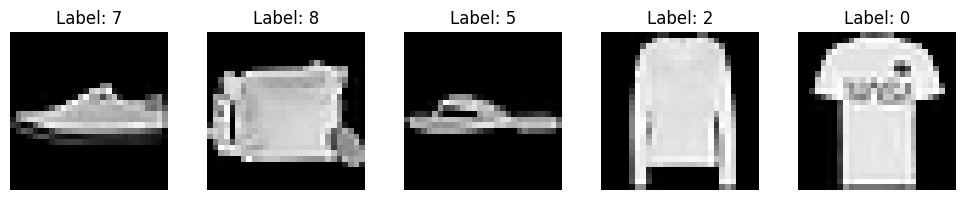

In [7]:
# Отображаем первые 5 изображений из X_train
plt.figure(figsize=(10, 2))

for i in range(5):
    img = X_train[i].reshape(28, 28)
    label = np.argmax(y_train[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Построим сверточную сеть (CNN), так как она предпочтительнее простого перцептрона для задач распознавания изображений. 3 сверточных слоя будет достаточно.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

K.clear_session()

# в этот раз используем картинку как вход без вытягивания в вектор!

model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D())  
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))



c:\Users\Eli\Desktop\2SEM_MEPHI\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Структура сети

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,066 (113.54 KB)

 Trainable params: 29,066 (113.54 KB)

 Non-trainable params: 0 (0.00 B)

Компиляция

In [10]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']  
)

Изменим "форму" входных данных.

In [11]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

Перед обучением подведем итог, проверим, что формат данных корректный.

In [12]:
print("Типы данных:")
print("X_train:", type(X_train))
print("X_val:", type(X_val))
print("y_train:", type(y_train))
print("y_val:", type(y_val))

print("\nРазмерности данных:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

print("\nПроверка на NaN значения:")
print("X_train contains NaN?", np.any(np.isnan(X_train)))
print("X_val contains NaN?", np.any(np.isnan(X_val)))
print("y_train contains NaN?", np.any(np.isnan(y_train)))
print("y_val contains NaN?", np.any(np.isnan(y_val)))

print("\nПроверка меток целевой переменной:")
print("y_train уникальные метки:", np.unique(np.argmax(y_train, axis=1)))
print("y_val уникальные метки:", np.unique(np.argmax(y_val, axis=1)))

print("\nПроверка диапазона значений признаков:")
print("X_train min:", np.min(X_train))
print("X_train max:", np.max(X_train))
print("X_val min:", np.min(X_val))
print("X_val max:", np.max(X_val))


Типы данных:
X_train: <class 'numpy.ndarray'>
X_val: <class 'numpy.ndarray'>
y_train: <class 'numpy.ndarray'>
y_val: <class 'numpy.ndarray'>

Размерности данных:
X_train shape: (14484, 28, 28, 1)
X_val shape: (2556, 28, 28, 1)
y_train shape: (14484, 10)
y_val shape: (2556, 10)

Проверка на NaN значения:
X_train contains NaN? False
X_val contains NaN? False
y_train contains NaN? False
y_val contains NaN? False

Проверка меток целевой переменной:
y_train уникальные метки: [0 1 2 3 4 5 6 7 8 9]
y_val уникальные метки: [0 1 2 3 4 5 6 7 8 9]

Проверка диапазона значений признаков:
X_train min: 0.0
X_train max: 1.0
X_val min: 0.0
X_val max: 1.0


Обучение

In [13]:
output = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=25,
    validation_data=(X_val, y_val)
)

Epoch 1/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5770 - loss: 1.2603 - val_accuracy: 0.7813 - val_loss: 0.5849
Epoch 2/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8139 - loss: 0.5147 - val_accuracy: 0.8310 - val_loss: 0.4682
Epoch 3/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8501 - loss: 0.4203 - val_accuracy: 0.8529 - val_loss: 0.4222
Epoch 4/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8656 - loss: 0.3792 - val_accuracy: 0.8654 - val_loss: 0.3768
Epoch 5/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8745 - loss: 0.3481 - val_accuracy: 0.8631 - val_loss: 0.3742
Epoch 6/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8802 - loss: 0.3217 - val_accuracy: 0.8631 - val_loss: 0.3733
Epoch 7/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8875 - loss: 0.3065 - val_accuracy: 0.8599 - val_loss: 0.3901
Epoch 8/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8920 - loss: 0.3002 - val_accuracy: 0.

Вывод метрик

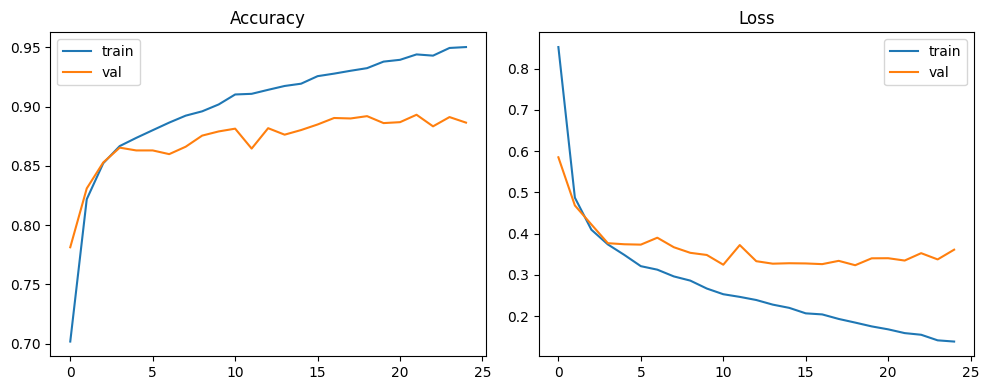

In [14]:
loss, acc = model.evaluate(X_val, y_val, verbose=0)

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(output.history['accuracy'], label='train')
plt.plot(output.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(output.history['loss'], label='train')
plt.plot(output.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()



plt.tight_layout()
plt.show()

Можем сказать, что у модели хорошие показатели, accuracy и loss на train и чуть хуже на valid

**Получим предсказания**

In [15]:

# Загрузка тестового набора данных
test_data = pd.read_csv('fmnist_test.csv')

# Извлечение столбцов с пикселями и нормализация значений
pixel_columns = [column for column in test_data.columns if column.startswith('pixel')]
X_test = test_data[pixel_columns].astype('float32') / 255.0

# Переформатирование данных для CNN (28x28x1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

# Получение вероятностей классов с помощью модели
predictions = model.predict(X_test_reshaped, batch_size=64, verbose=1)

# Получение окончательных предсказаний классов
final_predictions = predictions.argmax(axis=1)

# Создание итогового DataFrame для сохранения в CSV
output = pd.DataFrame({
    'Id': test_data['Id'],
    'label': final_predictions
})

# Сохранение результатов в файл
output.to_csv('serov_ia_submission_2.csv', index=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


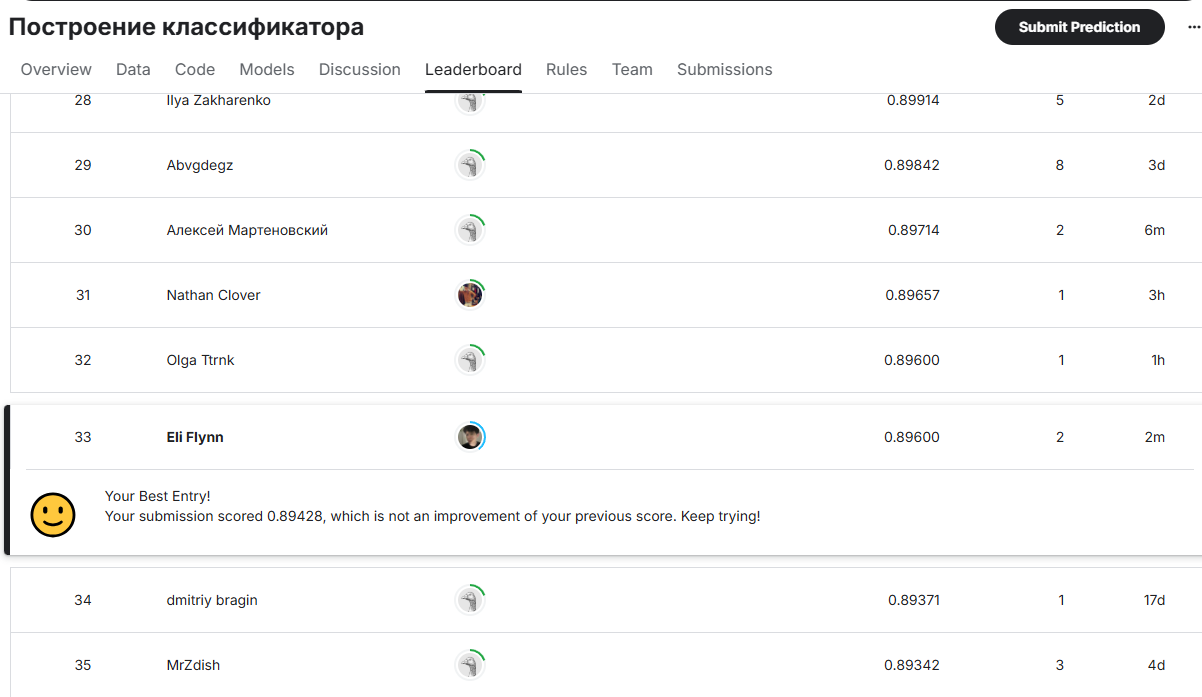